# Convolutional Neural Network (CNN) Fire Detection

In [4]:
# Import the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# PART 1: Building the CNN

In [5]:
# A. Import the Keras Libraries and Packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

In [6]:
# B. Initializing the CNN
classifier = Sequential()
  
# C. Creating the Convolutional Layer of the First Convolutional Block
classifier.add(Conv2D(filters = 32, kernel_size = (3, 3), strides =  (1,1), input_shape = (64,64,3), activation = "relu"))

# D. Creating the Pooling Layer of the First Convolutional Block
classifier.add (MaxPooling2D(pool_size = (2,2)))

# E. Creating the Convolutional Layer of the Second Convolutional Block
classifier.add(Conv2D(filters = 64, kernel_size = (3, 3), strides =  (1,1), activation = "relu"))

# F. Creating the Pooling Layer of the Second Convolutional Block
classifier.add (MaxPooling2D(pool_size = (2,2)))

# G. To Perform Flattening 
classifier.add(Flatten())

# H. Creating the Fully Connected Layer
 
# H.1 For the First Hidden Layer 
classifier.add(Dense(units = 64, kernel_initializer = "glorot_uniform", activation = "relu"))
classifier.add(Dropout(rate = 0.1))

# H.2 For the Second Hidden Layer 
classifier.add(Dense(units = 64, kernel_initializer = "glorot_uniform", activation = "relu"))
classifier.add(Dropout(rate = 0.1))

# H.3 For the Output Layer 
classifier.add(Dense(units = 1, kernel_initializer = "glorot_uniform", activation = "sigmoid"))

# I. Compiling the CNN
classifier.compile(optimizer = "Adam", loss = "binary_crossentropy", metrics = ["accuracy", "mse"])

print(classifier.summary())


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │       802,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 826,497 (3.15 MB)

 Trainable params: 826,497 (3.15 MB)

 Non-trainable params: 0 (0.00 B)

None


# PART 2: Data Distribution

['Deep_Problem_3', 'single_prediction', 'test', 'train', 'validation']
The Number of Samples for the Training Data Fire Category:
4000
The Number of Samples for the Training Data Non-Fire Category:
4000


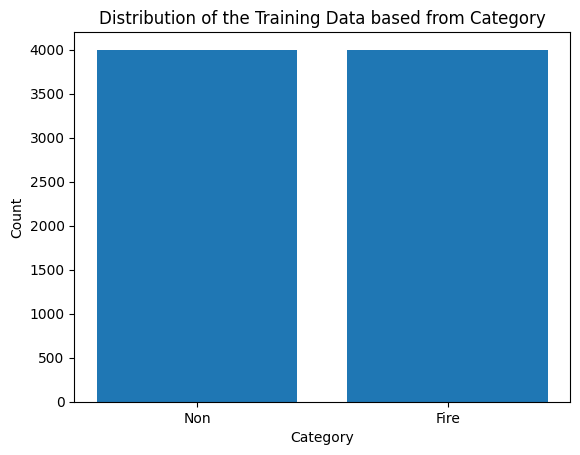

The Number of Samples for the Testing Data Fire Category:
500
The Number of Samples for the Testing Data Non Category:
500


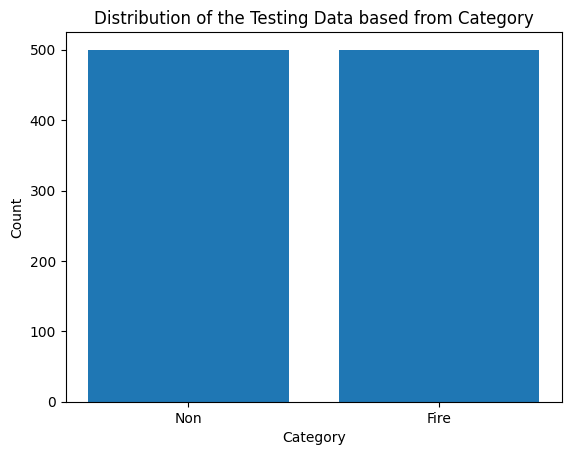

Validation Fire: 500
Validation Non-Fire: 500


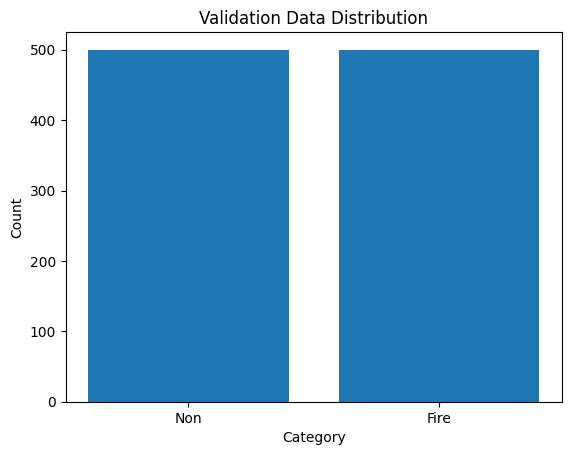

In [7]:
# A. For the Creation of the Training Dataset and Testing Dataset Directory

import os 
print(os.listdir("dataset"))

from pathlib import Path
data_directory = Path("dataset/")
train_directory = data_directory/"train"
test_directory = data_directory/"test"
val_directory = data_directory / "validation"

# B. For the Training Dataset data Distribution

def load_train():
    Fire_directory = train_directory/"Fire"
    Non_directory = train_directory/"Non"
    
    # Get the List of all the Images
    Fire = Fire_directory.glob("*.jpg")
    Non = Non_directory.glob("*.jpg")
    train_data = []
    train_label = []
    
    for img in Fire: 
        train_data.append(img)
        train_label.append("Fire")

    for img in Non: 
        train_data.append(img)
        train_label.append("Non")
        
    dataframe = pd.DataFrame(train_data)
    dataframe.columns = ["images"]
    dataframe["labels"] = train_label
    dataframe = dataframe.sample(frac = 1).reset_index(drop = True)
    return dataframe

train_data = load_train()
train_data.shape 

index_training_data = train_data["labels"].value_counts().index
values_training_data = train_data["labels"].value_counts().values
train_data_distribution = [index_training_data , values_training_data]
print("The Number of Samples for the Training Data Fire Category:")
print(values_training_data[0])
print("The Number of Samples for the Training Data Non-Fire Category:")
print(values_training_data[1])

plt.bar(index_training_data , values_training_data)
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Distribution of the Training Data based from Category")
plt.show()


# C. For the Testing Dataset data Distribution

def load_test():
    Fire_directory = test_directory/"Fire"
    Non_directory = test_directory/"Non"
    
    # Get the List of all the Images
    Fire = Fire_directory.glob("*.jpg")
    Non = Non_directory.glob("*.jpg")
    test_data = []
    test_label = []
    
    for img in Fire: 
        test_data.append(img)
        test_label.append("Fire")

    for img in Non: 
        test_data.append(img)
        test_label.append("Non")
        
    dataframe = pd.DataFrame(test_data)
    dataframe.columns = ["images"]
    dataframe["labels"] = test_label
    dataframe = dataframe.sample(frac = 1).reset_index(drop = True)
    return dataframe

test_data = load_test()
test_data.shape 

index_testing_data = test_data["labels"].value_counts().index
values_testing_data = test_data["labels"].value_counts().values
test_data_distribution = [index_testing_data , values_testing_data]
print("The Number of Samples for the Testing Data Fire Category:")
print(values_testing_data[0])
print("The Number of Samples for the Testing Data Non Category:")
print(values_testing_data[1])

plt.bar(index_testing_data , values_testing_data)
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Distribution of the Testing Data based from Category")
plt.show()

# D. For the Validation Dataset data Distribution
def load_validation():
    Fire_directory = val_directory / "Fire"
    Non_directory = val_directory / "Non"

    Fire = Fire_directory.glob("*.jpg")
    Non = Non_directory.glob("*.jpg")

    val_data, val_label = [], []

    for img in Fire:
        val_data.append(img)
        val_label.append("Fire")
    for img in Non:
        val_data.append(img)
        val_label.append("Non")

    dataframe = pd.DataFrame(val_data)
    dataframe.columns = ["images"]
    dataframe["labels"] = val_label
    dataframe = dataframe.sample(frac=1).reset_index(drop=True)
    return dataframe

val_data = load_validation()
index_val_data = val_data["labels"].value_counts().index
values_val_data = val_data["labels"].value_counts().values

print("Validation Fire:", values_val_data[0])
print("Validation Non-Fire:", values_val_data[1])

plt.bar(index_val_data, values_val_data)
plt.title("Validation Data Distribution")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()


# PART 3: Citting the CNN Model to the Images

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

train_datagenerator = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=None,
    shear_range=0.2,
    zoom_range=0.2,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip= True,
    vertical_flip= True,
    rescale= 1./255,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    interpolation_order=1,
    dtype=None)


training_set = train_datagenerator.flow_from_directory(
    "dataset/train",
    target_size=(64, 64),
    color_mode='rgb',
    classes=None,
    class_mode='binary',
    batch_size=32,
    shuffle=True,
    seed=None,
    save_to_dir=None,
    save_prefix='',
    save_format='jpg',
    follow_links=False,
    subset=None,
    interpolation='nearest',
    keep_aspect_ratio=False)


val_datagenerator = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=None,
    shear_range=0.2,
    zoom_range=0.2,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip= True,
    vertical_flip= True,
    rescale= 1./255,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    interpolation_order=1,
    dtype=None)

validation_set = val_datagenerator.flow_from_directory(
    "dataset/validation",
    target_size=(64, 64),
    color_mode='rgb',
    classes=None,
    class_mode='binary',
    batch_size=32,
    shuffle=True,
    seed=None,
    save_to_dir=None,
    save_prefix='',
    save_format='jpg',
    follow_links=False,
    subset=None,
    interpolation='nearest',
    keep_aspect_ratio=False)

records = classifier.fit(training_set,
                         steps_per_epoch = 250, # training data/batch size = 8048/32 =251.5
                         epochs = 50, 
                         validation_data = validation_set,
                         validation_steps = 32,
) # validation data/batch size = 1000/32 = 31.25


# 8048 / 32 = 252 approx
# divide the whole testing dataset sa no. of epoch
# 2000 / 32 = 63 


# To Save the Trained Model

classifier.save("cnn.h5")
print("Classifier Saved on the Disk")

Found 8000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/50


C:\Users\bened\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


250/250 ━━━━━━━━━━━━━━━━━━━━ 23s 86ms/step - accuracy: 0.6066 - loss: 0.6461 - mse: 0.2283 - val_accuracy: 0.6900 - val_loss: 0.5970 - val_mse: 0.2049
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 19s 75ms/step - accuracy: 0.7357 - loss: 0.5122 - mse: 0.1707 - val_accuracy: 0.7430 - val_loss: 0.5226 - val_mse: 0.1761
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 19s 75ms/step - accuracy: 0.8092 - loss: 0.4136 - mse: 0.1331 - val_accuracy: 0.7490 - val_loss: 0.4578 - val_mse: 0.1526
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 19s 75ms/step - accuracy: 0.8375 - loss: 0.3648 - mse: 0.1148 - val_accuracy: 0.8480 - val_loss: 0.3506 - val_mse: 0.1074
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 19s 77ms/step - accuracy: 0.8516 - loss: 0.3400 - mse: 0.1054 - val_accuracy: 0.7680 - val_loss: 0.5435 - val_mse: 0.1699
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 19s 74ms/step - accuracy: 0.8553 - loss: 0.3311 - mse: 0.1034 - val_accuracy: 0.8680 - val_loss: 0.2998 - val_mse: 0.0932
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━

Classifier Saved on the Disk


# PART 4: Plotting the Loss, Accuracy and MSE Charts

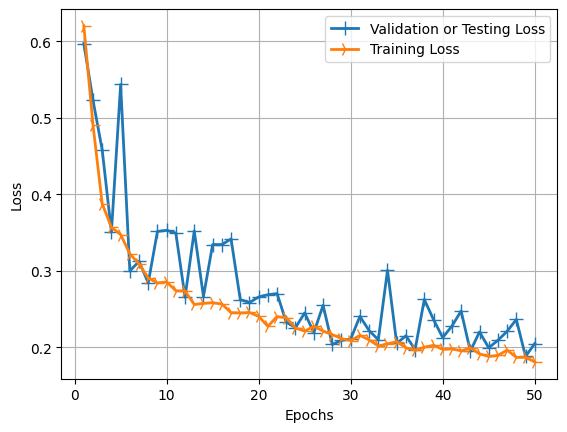

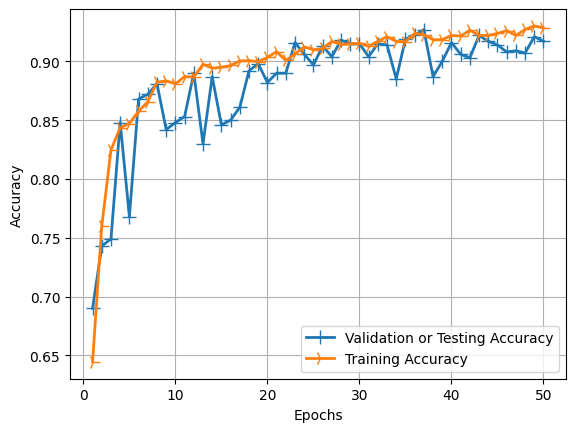

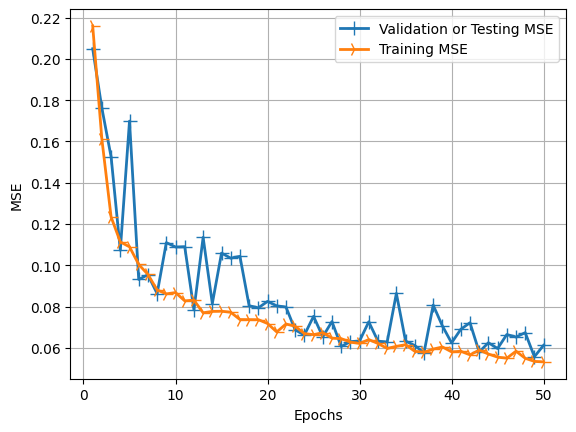

In [9]:
# A.Plotting the loss Chart

classifier_dictionary = records.history
 
training_loss_values = classifier_dictionary["loss"]
validation_loss_values = classifier_dictionary["val_loss"]
epochs = range(1, len(training_loss_values) + 1)
 
line1 = plt.plot(epochs, validation_loss_values, label = "Validation or Testing Loss")
line2 = plt.plot(epochs, training_loss_values, label = "Training Loss")
plt.setp(line1, linewidth = 2.0, marker = "+", markersize = 10.0)
plt.setp(line2, linewidth = 2.0, marker = "4", markersize = 10.0)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()


# B. Plotting the Accuracy Charts
 
classifier_dictionary = records.history
 
training_accuracy_values = classifier_dictionary["accuracy"]
validation_accuracy_values = classifier_dictionary["val_accuracy"]
epochs = range(1, len(training_accuracy_values) + 1)
 
line1 = plt.plot(epochs, validation_accuracy_values, label = "Validation or Testing Accuracy")
line2 = plt.plot(epochs, training_accuracy_values, label = "Training Accuracy")
plt.setp(line1, linewidth = 2.0, marker = "+", markersize = 10.0)
plt.setp(line2, linewidth = 2.0, marker = "4", markersize = 10.0)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()
plt.show()

 # C. Plotting the MSE Charts
 
classifier_dictionary = records.history
 
training_mse_values = classifier_dictionary["mse"]
validation_mse_values = classifier_dictionary["val_mse"]
epochs = range(1, len(training_mse_values) + 1)
 
line1 = plt.plot(epochs, validation_mse_values, label = "Validation or Testing MSE")
line2 = plt.plot(epochs, training_mse_values, label = "Training MSE")
plt.setp(line1, linewidth = 2.0, marker = "+", markersize = 10.0)
plt.setp(line2, linewidth = 2.0, marker = "4", markersize = 10.0)
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.grid(True)
plt.legend()
plt.show()

# PART 5: Evaluating the Performance of the Model Using the Testing Dataset

In [10]:
test_datagenerator = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=None,
    shear_range=0.2,
    zoom_range=0.2,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip= True,
    vertical_flip= True,
    rescale= 1./255,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    interpolation_order=1,
    dtype=None)

testing_set = test_datagenerator.flow_from_directory(
    "dataset/test",
    target_size=(64, 64),
    color_mode='rgb',
    classes=None,
    class_mode='binary',
    batch_size=32,
    shuffle=True,
    seed=None,
    save_to_dir=None,
    save_prefix='',
    save_format='jpg',
    follow_links=False,
    subset=None,
    interpolation='nearest',
    keep_aspect_ratio=False)

Found 1000 images belonging to 2 classes.


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.9025 - loss: 0.2237 - mse: 0.0699

loss: 0.24527786672115326

compile_metrics: 0.8870000243186951
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step


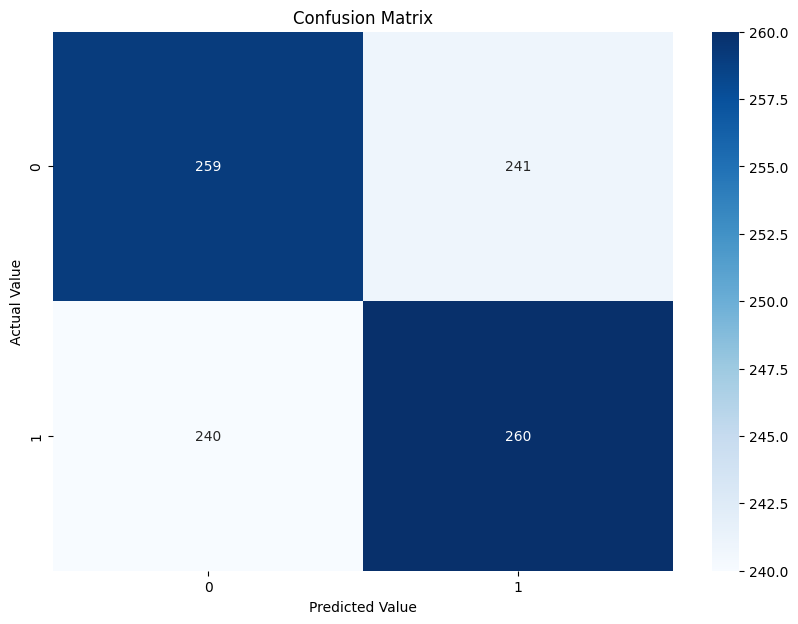

In [11]:
# Evaluate the Model on the Testing Dataset
evaluation_results = classifier.evaluate(testing_set, batch_size = 32, verbose = 1)

# To Print the Evaluation metrics 
for metric_name, metric_value in zip(classifier.metrics_names, evaluation_results):
    print("")
    print(f"{metric_name}: {metric_value}")
    
# To Get the Classifier Prediction using the Testing Dataset
prediction_probability = classifier.predict(testing_set)
prediction = np.rint(prediction_probability)

# To Generate the Testing Dataset Labels
testing_dataset_labels = test_data["labels"]
testing_dataset_labels = np.where(testing_dataset_labels == "Fire", 0, 1)
#testing_dataset_labels = testing_dataset_labels.values

#testing_dataset_labels = testing_set.classes

# To Generate the Plot of the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(testing_dataset_labels, prediction)

# Conda install seaborn
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Confusion Matrix')
plt.show()

# PART 6: PERFORM HOLD-OUT VALIDATION TO ASSESS THE ARTIFICIAL NEURAL NETWORK MODEL'S PERFORMANCE

Classification Accuracy: 0.5190
 
Classification Error: 0.4810
 
Sensitivity: 0.5200
 
Specificity: 0.5180
 
False Positive Rate: 0.4820
 
Precision: 0.5190
 
F1-Score: 0.5195
 


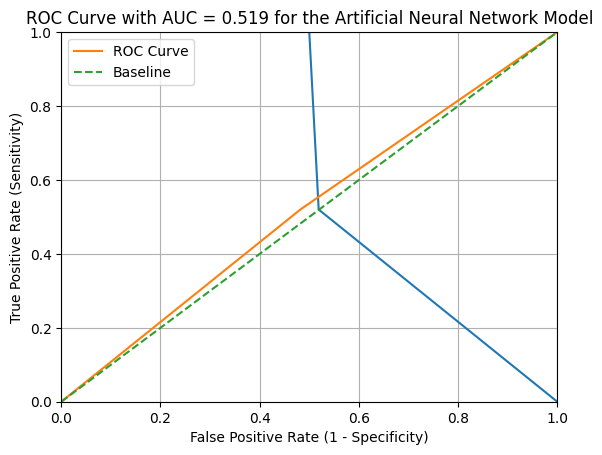

In [12]:
TP = confusion_matrix[1, 1]
TN = confusion_matrix[0, 0]
FP = confusion_matrix[0, 1]
FN = confusion_matrix[1, 0]

# A. For the Classification Accuracy
# Overall, how often is the classifier correct?
# It is the proportion of correct predictions over the total number of predictions.

from sklearn.metrics import accuracy_score
classification_accuracy = accuracy_score(testing_dataset_labels, prediction)
print("Classification Accuracy: %.4f"
      %classification_accuracy)
print(' ')

# classification_accuracy = (TP+TN) / (TP + TN + FP + FN)

# B. For the Classification Error
# Overall, how often is the classifier incorrect?
# All false predictions over the total number of predictions.

classification_error = 1 - classification_accuracy
print("Classification Error: %.4f"
      %classification_error)
print(' ')

# classification_error = (FP + FN) / (TP + TN + FP + FN)

# C. For the Sensitivity, Recall Score, Probability of Detection, or True Positive Rate
# When the actual value is positive, how often is the prediction correct?
# Out of all actual Positives, how many did we predict as Positive?

from sklearn.metrics import recall_score
sensitivity = recall_score(testing_dataset_labels, prediction)
print('Sensitivity: %.4f' 
      % sensitivity)
print(' ')

# sensitivity = TP / (TP + FN)

# D. For the Specificity or True Negative Rate
# When the actual value is negative, how often is the prediction correct?
# Out of all actual Negatives, how many did we predict as Negative?

specificity = TN / (TN + FP)
print('Specificity: %.4f' 
      % specificity)
print(' ')

# E. For the False Positive Rate
# When the actual value is negative, how often is the prediction incorrect?

false_positive_rate = 1 - specificity
print('False Positive Rate: %.4f' 
      % false_positive_rate)
print(' ')

# false_positive_rate = FN / (TN + FP)

# F. For the Precision or Positive Predictive Value 
# When a positive value is predicted, how often is the prediction correct?
# Out of all predicted Positive cases, how many were actually Positive?

from sklearn.metrics import precision_score
precision = precision_score(testing_dataset_labels, prediction)
print('Precision: %.4f' 
      % precision)
print(' ')

# precision = TP / (TP + FP)

# G. For the F1-Score
 # It is the harmonic, or weighted, an average of Precision and Sensitivity.

from sklearn.metrics import f1_score
f1_score = f1_score(testing_dataset_labels, prediction)
print('F1-Score: %.4f' 
      % f1_score)
print(' ')

# f1_score = 2*precision*sensitivity / (precision + sensitivity)

# H. For the Classification Report
from sklearn.metrics import classification_report
classification_report = classification_report(testing_dataset_labels, prediction)

# I. For the Precision-Recall Curve
from sklearn.metrics import precision_recall_curve
precision_value, recall_value, threshold = precision_recall_curve(testing_dataset_labels, prediction)

plt.plot(precision_value, recall_value)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("Precision-Recall Curve for the Artificial Neural Network Model")
plt.xlabel("Precision")
plt.ylabel("Recall")

# J. For The ROC Curve with AUC
# A Receiver Operating Characteristic Curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. 
# The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.

# J.1. For the Receiver Operating Curve (ROC)
from sklearn.metrics import roc_curve
FPR, TPR, threshold = roc_curve(testing_dataset_labels, prediction)

# J.2. For the Area Under the Curve (AUC)
from sklearn.metrics import roc_auc_score
AUC_score = roc_auc_score(testing_dataset_labels, prediction)

# The perfect model will have an AUC of 1.0. The closer the AUC to 1.0, the better the predictions.
   
# J.3. To Plot the ROC Curve with AUC
plt.plot(FPR, TPR, label = "ROC Curve")
plt.xlim([0, 1])
plt.ylim([0, 1])

# J.4. For the Plot of Baseline for AUC
# The 45-degree line is the baseline for which the AUC is 0.5. 

plt.plot(np.linspace(0, 1, 10), np.linspace(0, 1, 10), label='Baseline', linestyle='--')
plt.title(f'ROC Curve with AUC = {round(AUC_score,4)} for the Artificial Neural Network Model')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend();
plt.grid(True)
plt.show()

In [13]:
from keras.utils import load_img
from keras.utils import img_to_array

# A. To Load the Trained Model

from keras.models import load_model
classifier = load_model("cnn.h5")

# Part 7: Making SIngle Image Prediction

In [14]:
from tensorflow.keras.preprocessing import image
import numpy as np

test_image = load_img("dataset/single_prediction/fire_test.jpg", target_size=(64, 64))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image = test_image / 255.0  # Rescale like in training

prediction = classifier.predict(test_image)
print("Raw prediction probability:", prediction[0][0])

# Check class indices
print("Class indices:", training_set.class_indices)

# Adjust logic based on mapping
if prediction[0][0] > 0.5:
    result = 'Fire' if training_set.class_indices['Fire'] == 1 else 'Non-Fire'
else:
    result = 'Non-Fire' if training_set.class_indices['Fire'] == 1 else 'Fire'

print("Prediction:", result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Raw prediction probability: 0.17626004
Class indices: {'Fire': 0, 'Non': 1}
Prediction: Fire


In [15]:
# C. For the Second Single Image

test_image = load_img("dataset/single_prediction/non_test.jpg", target_size=(64, 64))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image = test_image / 255.0  # Rescale like training

# Predict
prediction = classifier.predict(test_image)
probability = prediction[0][0]
print("Raw prediction probability:", probability)

# Get class mapping
class_mapping = training_set.class_indices
print("Class indices:", class_mapping)

# Check which label corresponds to 1
# Example: {'Fire': 0, 'Non-Fire': 1}
if probability > 0.5:
    predicted_label = 'Fire' if class_mapping['Fire'] == 1 else 'Non-Fire'
else:
    predicted_label = 'Non-Fire' if class_mapping['Fire'] == 1 else 'Fire'

print("Prediction:", predicted_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Raw prediction probability: 0.9994332
Class indices: {'Fire': 0, 'Non': 1}
Prediction: Non-Fire


# Part 8 Opmtimization

In [28]:
from tensorflow.keras.models import Sequential
from keras_tuner import Hyperband
from keras_tuner.engine.hyperparameters import HyperParameters
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Ftrl
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

# Define the model for hyperparameter tuning
def build_model(hp):
    model = Sequential()
    model.add(Conv2D(filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=32), 
                     kernel_size=hp.Choice('conv_1_kernel', values=[3, 5]), 
                     activation='relu', input_shape=(128, 128, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())

    model.add(Conv2D(filters=hp.Int('conv_2_filter', min_value=32, max_value=128, step=32), 
                     kernel_size=hp.Choice('conv_2_kernel', values=[3, 5]), 
                     activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())

    model.add(Conv2D(filters=hp.Int('conv_3_filter', min_value=64, max_value=256, step=64), 
                     kernel_size=hp.Choice('conv_3_kernel', values=[3, 5]), 
                     activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    
    model.add(Conv2D(filters=hp.Int('conv_4_filter', min_value=64, max_value=256, step=64), 
                     kernel_size=hp.Choice('conv_4_kernel', values=[3, 5]), 
                     activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    

    model.add(Flatten())

    model.add(Dense(units=hp.Int('dense_1_units', min_value=128, max_value=512, step=64), activation='relu'))
    model.add(Dropout(rate=hp.Float('dropout_1', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(Dense(units=hp.Int('dense_2_units', min_value=64, max_value=256, step=64), activation='relu'))
    model.add(Dropout(rate=hp.Float('dropout_2', min_value=0.2, max_value=0.5, step=0.1)))

    model.add(Dense(units=1, activation='sigmoid'))

    model.compile(optimizer=hp.Choice('optimizer', values=['Adam', 'sgd']),
                  loss='binary_crossentropy', 
                  metrics=['accuracy','mse'])
    return model

In [29]:
# Creating the HyperParameters
from keras_tuner import HyperParameters

hp = HyperParameters()
hp.Choice('learning_rate', values=[0.001])
hp.Choice('batch_size', values=[16])

16

In [30]:
from keras_tuner.engine.hyperparameters import HyperParameters

tuner = Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=10,
    factor=3,
    directory='dataset',
    project_name='Deep_Problem_3'
)

learning_rate = hp.get('learning_rate')
batch_size = hp.get('batch_size')

print("Learning Rate:", learning_rate)
print("Batch Size:", batch_size)

Learning Rate: 0.001
Batch Size: 16


In [31]:
# Retrieve the best model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_generator = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=None,
    shear_range=0.2,
    zoom_range=0.2,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1./255,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    interpolation_order=1,
    dtype=None
)

training_set = train_data_generator.flow_from_directory(
    "dataset/train",
    target_size=(128, 128),
    color_mode='rgb',
    classes=None,
    class_mode='binary',
    batch_size=16,
    shuffle=True,
    seed=None,
    save_to_dir=None,
    save_prefix='',
    save_format='jpg',
    follow_links=False,
    subset=None,
    interpolation='nearest',
    keep_aspect_ratio=False
)

val_datagenerator = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=None,
    shear_range=0.2,
    zoom_range=0.2,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1./255,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    interpolation_order=1,
    dtype=None
    
)

validation_set = val_datagenerator.flow_from_directory(
    "dataset/test",
    target_size=(128, 128),
    color_mode='rgb',
    classes=None,
    class_mode='binary',
    batch_size=16,
    subset=None,
    shuffle=True,
    seed=None,
    save_to_dir=None,
    save_prefix='',
    save_format='jpg',
    follow_links=False,
    interpolation='nearest',
    keep_aspect_ratio=False
)

Found 8000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [32]:
tuner = Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs= 10,
    hyperparameters=hp,
    executions_per_trial=1,
    directory='Tuner',
    project_name='hyperband_optimizing',
)

from keras.callbacks import Callback

class EarlyStopByAccuracy(Callback):
    def __init__(self, threshold=0.6):
        super(EarlyStopByAccuracy, self).__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None):
        if logs is None:
            logs = {}
        if epoch == 0:  # Check the accuracy after the first epoch
            accuracy = logs.get('accuracy')
            if accuracy is not None and accuracy < self.threshold:
                self.model.stop_training = True
                print(f"\nEpoch {epoch+1}: early stopping as accuracy {accuracy:.4f} is below threshold {self.threshold:.4f}")


early_stop_callback = EarlyStopByAccuracy(threshold=0.6)

In [33]:
#Perform the hyperparameter search
tuner.search(training_set,
             epochs=10,  # Increase the number of epochs
             validation_data=validation_set,
            callbacks=[early_stop_callback])

Trial 30 Complete [00h 33m 46s]
val_accuracy: 0.8569999933242798

Best val_accuracy So Far: 0.8569999933242798
Total elapsed time: 04h 22m 30s


In [34]:
# Print the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
The hyperparameter search is complete. The optimal learning rate for the optimizer is {best_hps.get('learning_rate')} 
and the optimal number of units in the first densely-connected layer is {best_hps.get('dense_1_units')}.
""")


The hyperparameter search is complete. The optimal learning rate for the optimizer is 0.001 
and the optimal number of units in the first densely-connected layer is 128.



In [35]:
# Print the best hyperparameters
print("The best hyperparameters are:")
for param, value in best_hps.values.items():
    print(f"{param}: {value}")

The best hyperparameters are:
learning_rate: 0.001
batch_size: 16
conv_1_filter: 128
conv_1_kernel: 3
conv_2_filter: 96
conv_2_kernel: 3
conv_3_filter: 256
conv_3_kernel: 5
conv_4_filter: 64
conv_4_kernel: 5
dense_1_units: 128
dropout_1: 0.30000000000000004
dense_2_units: 128
dropout_2: 0.2
optimizer: Adam
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0


In [36]:
#callbbacks
best_model = tuner.hypermodel.build(best_hps)

In [38]:
history = best_model.fit(
    training_set,
    epochs= 50,  # Train for more epochs to ensure the model learns well
    validation_data=validation_set
)

Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 233s 467ms/step - accuracy: 0.7832 - loss: 0.4787 - mse: 0.1536 - val_accuracy: 0.7520 - val_loss: 0.5313 - val_mse: 0.1760
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 226s 452ms/step - accuracy: 0.8210 - loss: 0.4055 - mse: 0.1280 - val_accuracy: 0.7310 - val_loss: 0.5689 - val_mse: 0.1826
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 230s 461ms/step - accuracy: 0.8389 - loss: 0.3778 - mse: 0.1179 - val_accuracy: 0.6740 - val_loss: 0.6388 - val_mse: 0.2208
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 222s 444ms/step - accuracy: 0.8627 - loss: 0.3321 - mse: 0.1016 - val_accuracy: 0.8110 - val_loss: 0.4344 - val_mse: 0.1356
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 226s 453ms/step - accuracy: 0.8756 - loss: 0.3185 - mse: 0.0952 - val_accuracy: 0.8260 - val_loss: 0.3932 - val_mse: 0.1254
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 227s 454ms/step - accuracy: 0.8777 - loss: 0.3083 - mse: 0.0926 - val_accuracy: 0.6880 - val_loss: 0.6639 - val_mse: 0.2204
Epoch 7/50
500/5

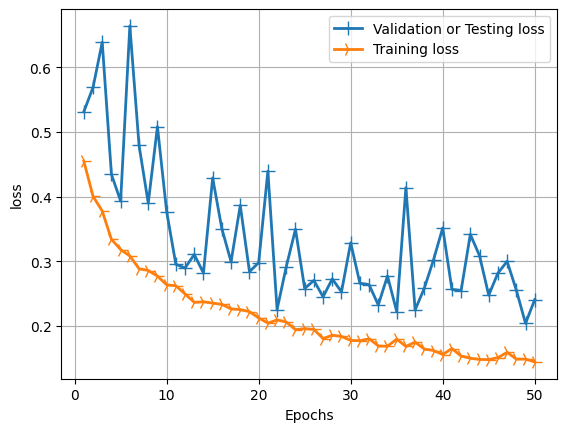

In [39]:
# A. Plotting the Loss Charts

classifier_dictionary = history.history
training_loss_values = classifier_dictionary['loss']
validation_loss_values = classifier_dictionary['val_loss']
epochs = range(1, len(training_loss_values) + 1)

line1 = plt.plot(epochs, validation_loss_values, label = 'Validation or Testing loss')
line2 = plt.plot(epochs, training_loss_values, label = 'Training loss')
plt.setp(line1, linewidth = 2.0, marker = '+', markersize = 10.0)
plt.setp(line2, linewidth = 2.0, marker = '4', markersize = 10.0)
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.grid(True)
plt.legend()
plt.show()

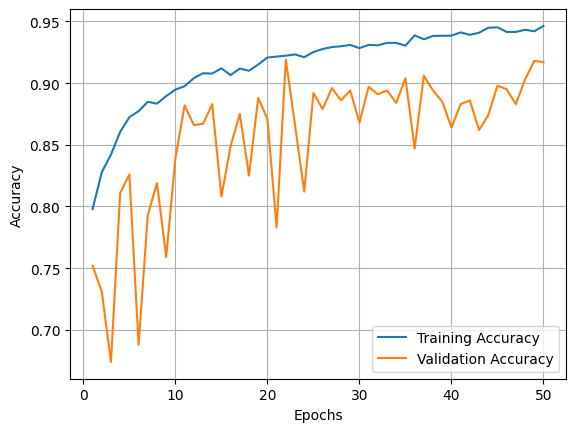

In [40]:
classifier_dictionary = history.history

training_accuracy_values = classifier_dictionary['accuracy']
validation_accuracy_values = classifier_dictionary['val_accuracy']
epochs = range(1, len(training_accuracy_values) + 1)

plt.plot(epochs, training_accuracy_values, label="Training Accuracy")
plt.plot(epochs, validation_accuracy_values, label="Validation Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

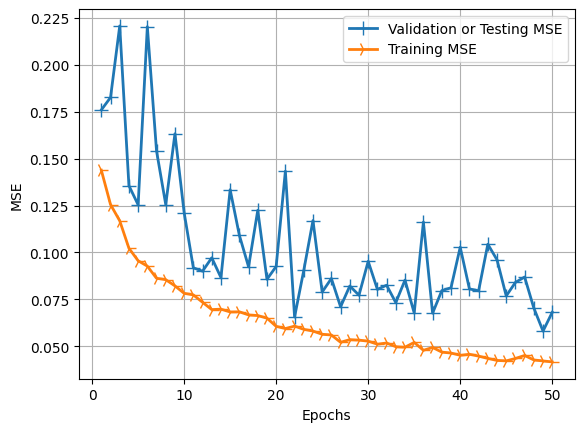

In [41]:
# C. Plotting the MSE Charts

classifier_dictionary = history.history

training_mse_values = classifier_dictionary['mse']
validation_mse_values = classifier_dictionary['val_mse']
epochs = range(1, len(training_mse_values) + 1)

line1 = plt.plot(epochs, validation_mse_values, label = 'Validation or Testing MSE')
line2 = plt.plot(epochs, training_mse_values, label = 'Training MSE')
plt.setp(line1, linewidth = 2.0, marker = '+', markersize = 10.0)
plt.setp(line2, linewidth = 2.0, marker = '4', markersize = 10.0)
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.grid(True)
plt.legend()
plt.show()

In [44]:
evaluation_results = best_model.evaluate(validation_set, batch_size=16, verbose=1)
for metric_name, metric_value in zip(best_model.metrics_names, evaluation_results):
    print(f'{metric_name}: {metric_value}')

prediction_proba = best_model.predict(validation_set)
prediction = np.rint(prediction_proba)

testing_dataset_labels = testing_set.classes
 
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(testing_dataset_labels, prediction)

63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 108ms/step - accuracy: 0.9209 - loss: 0.2137 - mse: 0.0575
loss: 0.23103521764278412
compile_metrics: 0.9169999957084656
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 110ms/step


In [45]:
# Save the model in TensorFlow SavedModel format
best_model.save("BEST_MODEL.h5")

print("Classifier Saved in the Disk")

Classifier Saved in the Disk


Text(95.72222222222221, 0.5, 'Actual Value')

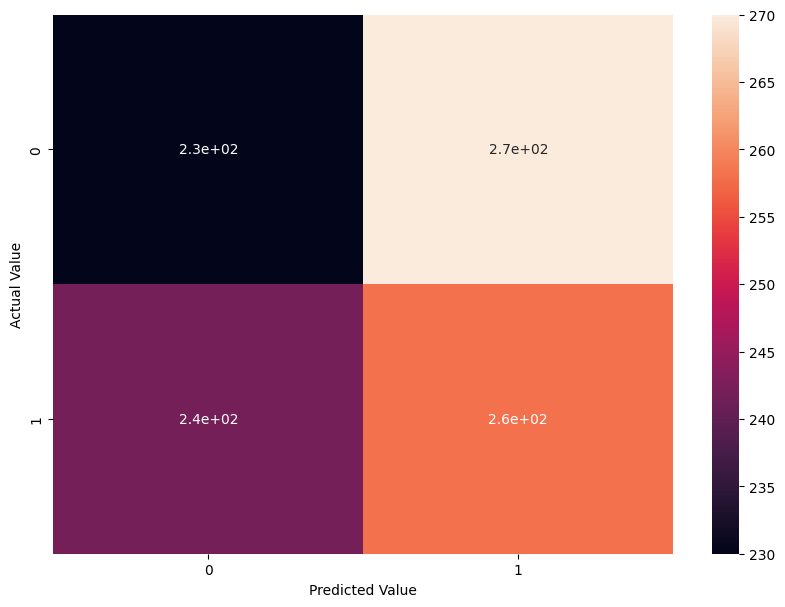

In [46]:
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix, annot=True)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")

In [47]:
# C. Computing the Hold-out Accuracy

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(testing_dataset_labels, prediction)
print("Hold-out Accuracy:")
print(accuracy)
print(" ")

Hold-out Accuracy:
0.488
 


In [48]:
# D. Generating the Classification report

from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(testing_dataset_labels, prediction))

Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.46      0.47       500
           1       0.49      0.52      0.50       500

    accuracy                           0.49      1000
   macro avg       0.49      0.49      0.49      1000
weighted avg       0.49      0.49      0.49      1000



In [49]:
TP = confusion_matrix[1, 1]
TN = confusion_matrix[0, 0]
FP = confusion_matrix[0, 1]
FN = confusion_matrix[1, 0]

In [50]:
# A. For the Classification Accuracy
# Overall, how often is the classifier correct?
# It is the proportion of correct predictions over the total number of predictions.

from sklearn.metrics import accuracy_score
classification_accuracy = accuracy_score(testing_dataset_labels, prediction)
print("Classification Accuracy: %.4f"
      %classification_accuracy)
print(' ')

Classification Accuracy: 0.4880
 


In [51]:
# C. For the Sensitivity, Recall Score, Probability of Detection, or True Positive Rate
# When the actual value is positive, how often is the prediction correct?
# Out of all actual Positives, how many did we predict as Positive?

from sklearn.metrics import recall_score
sensitivity = recall_score(testing_dataset_labels, prediction)
print('Sensitivity: %.4f' 
      % sensitivity)
print(' ')

Sensitivity: 0.5160
 


In [52]:
# D. For the Specificity or True Negative Rate
# When the actual value is negative, how often is the prediction correct?
# Out of all actual Negatives, how many did we predict as Negative?

specificity = TN / (TN + FP)
print('Specificity: %.4f' 
      % specificity)
print(' ')

Specificity: 0.4600
 


In [53]:
# E. For the False Positive Rate
# When the actual value is negative, how often is the prediction incorrect?

false_positive_rate = 1 - specificity
print('False Positive Rate: %.4f' 
      % false_positive_rate)
print(' ')

False Positive Rate: 0.5400
 


In [54]:
# F. For the Precision or Positive Predictive Value 
# When a positive value is predicted, how often is the prediction correct?
# Out of all predicted Positive cases, how many were actually Positive?

from sklearn.metrics import precision_score
precision = precision_score(testing_dataset_labels, prediction)
print('Precision: %.4f' 
      % precision)
print(' ')

Precision: 0.4886
 


In [55]:
# G. For the F1-Score
 # It is the harmonic, or weighted, an average of Precision and Sensitivity.

from sklearn.metrics import f1_score
f1_score = f1_score(testing_dataset_labels, prediction)
print('F1-Score: %.4f' 
      % f1_score)
print(' ')

F1-Score: 0.5019
 


In [56]:
# H. For the Classification Report
from sklearn.metrics import classification_report
classification_report = classification_report(testing_dataset_labels, prediction)

Text(0, 0.5, 'Recall')

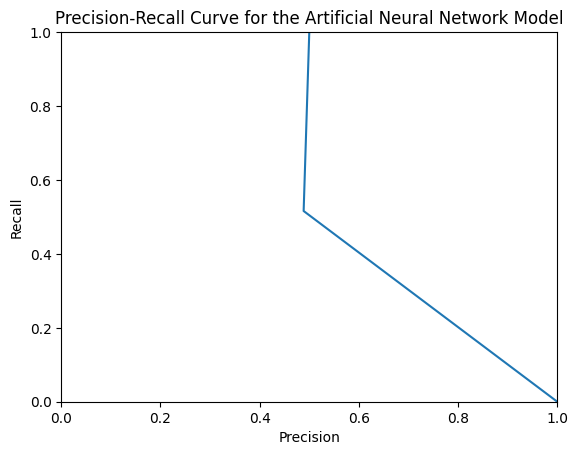

In [57]:
# I. For the Precision-Recall Curve
from sklearn.metrics import precision_recall_curve
precision_value, recall_value, threshold = precision_recall_curve(testing_dataset_labels, prediction)

plt.plot(precision_value, recall_value)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("Precision-Recall Curve for the Artificial Neural Network Model")
plt.xlabel("Precision")
plt.ylabel("Recall")

(0.0, 1.0)

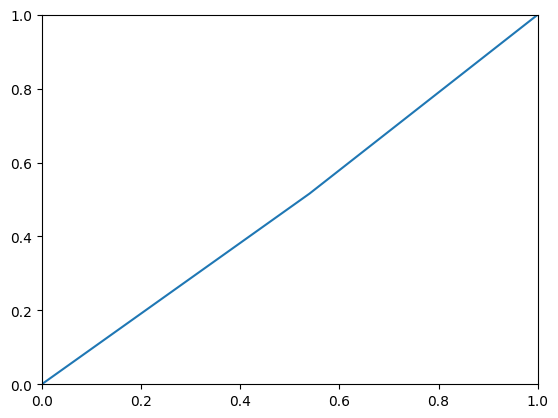

In [58]:
# J. For The ROC Curve with AUC
# J.1. For the Receiver Operating Curve (ROC)

from sklearn.metrics import roc_curve
FPR, TPR, threshold = roc_curve(testing_dataset_labels, prediction)

# J.2. For the Area Under the Curve (AUC)

from sklearn.metrics import roc_auc_score
AUC_score = roc_auc_score(testing_dataset_labels, prediction)

# J.3. To Plot the ROC Curve with AUC

plt.plot(FPR, TPR, label = "ROC Curve")
plt.xlim([0, 1])
plt.ylim([0, 1])

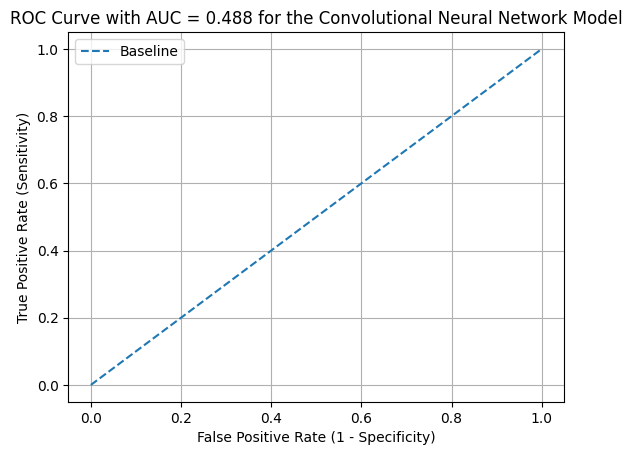

In [59]:
# J.4. For the Plot of Baseline for AUC

plt.plot(np.linspace(0, 1, 10), np.linspace(0, 1, 10), label='Baseline', linestyle='--')
plt.title(f'ROC Curve with AUC = {round(AUC_score,4)} for the Convolutional Neural Network Model')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend();
plt.grid(True)
plt.show()

# REPEATING PART 6 B: PERFORM CROSS VALIDATION TO ASSESS THE CNN MODEL'S PERFORMANCE

In [60]:
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from keras_tuner import RandomSearch, Hyperband
from keras_tuner.engine.hyperparameters import HyperParameters
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Ftrl

# Define the model for hyperparameter tuning
def create_model():
    model = Sequential()
    model.add(Conv2D(filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=32), kernel_size=hp.Choice('conv_1_kernel', values=[3, 5]), activation='relu', input_shape=(128, 128, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())

    model.add(Conv2D(filters=hp.Int('conv_2_filter', min_value=32, max_value=128, step=32), kernel_size=hp.Choice('conv_2_kernel', values=[3, 5]), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())

    model.add(Conv2D(filters=hp.Int('conv_3_filter', min_value=64, max_value=256, step=64), kernel_size=hp.Choice('conv_3_kernel', values=[3, 5]), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    
    model.add(Conv2D(filters=hp.Int('conv_4_filter', min_value=64, max_value=256, step=64), kernel_size=hp.Choice('conv_4_kernel', values=[3, 5]), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    
    model.add(Flatten())

    model.add(Dense(units=hp.Int('dense_1_units', min_value=128, max_value=512, step=64), activation='relu'))
    model.add(Dropout(rate=hp.Float('dropout_1', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(Dense(units=hp.Int('dense_2_units', min_value=64, max_value=256, step=64), activation='relu'))
    model.add(Dropout(rate=hp.Float('dropout_2', min_value=0.2, max_value=0.5, step=0.1)))

    model.add(Dense(units=1, activation='sigmoid'))

    model.compile(optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[0.001, 0.0001, 0.00001])), 
                  loss='binary_crossentropy', 
                  metrics=['accuracy','mse'])
    return model

In [61]:
from sklearn.model_selection import StratifiedKFold
from scikeras.wrappers import KerasClassifier

best_model1 = KerasClassifier(build_fn=create_model, epochs=10, batch_size=64, verbose=1)
k_fold = StratifiedKFold(n_splits = 2, shuffle = True, random_state=42)
 
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Assuming you have already loaded the train_data DataFrame
train_images = []
train_labels = []

for idx, row in train_data.iterrows():
    img_path = row['images']
    label = row['labels']
    img = load_img(img_path, target_size=(128, 128))  # Specify the desired image size
    img_array = img_to_array(img) / 255.0  # Normalize the pixel values to [0, 1]
    train_images.append(img_array)
    if label == "Fire":
        train_labels.append(0)
    else:
        train_labels.append(1)

train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [64]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score

In [63]:
# Using Accuracy as Scoring Metric for Cross-Validation
accuracy = cross_val_score(estimator=best_model1, X=train_images, y=train_labels, cv=k_fold, scoring="accuracy", n_jobs=1, error_score='raise')
accuracy_average = accuracy.mean()
accuracy_standard_deviation = accuracy.std()

C:\Users\bened\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\bened\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 247ms/step - accuracy: 0.7464 - loss: 0.5224 - mse: 0.1693
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 238ms/step - accuracy: 0.8911 - loss: 0.2605 - mse: 0.0801
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 238ms/step - accuracy: 0.9078 - loss: 0.2351 - mse: 0.0686
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 235ms/step - accuracy: 0.9449 - loss: 0.1492 - mse: 0.0436
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 238ms/step - accuracy: 0.9542 - loss: 0.1318 - mse: 0.0375
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 237ms/step - accuracy: 0.9610 - loss: 0.1057 - mse: 0.0297
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 237ms/step - accuracy: 0.9743 - loss: 0.0749 - mse: 0.0209
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 236ms/step - accuracy: 0.9688 - loss: 0.0804 - mse: 0.0227
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 237ms/step - accuracy: 0.9752 - loss: 0.0709 - mse: 0.0200
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 235ms/step - accuracy: 0.9786 - loss: 0.0585 - m

C:\Users\bened\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\bened\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 238ms/step - accuracy: 0.7199 - loss: 0.5649 - mse: 0.1859
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 236ms/step - accuracy: 0.8695 - loss: 0.3058 - mse: 0.0918
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 255ms/step - accuracy: 0.9117 - loss: 0.2170 - mse: 0.0638
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 242ms/step - accuracy: 0.9303 - loss: 0.1589 - mse: 0.0487
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 241ms/step - accuracy: 0.9318 - loss: 0.1746 - mse: 0.0504
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 263ms/step - accuracy: 0.9590 - loss: 0.0964 - mse: 0.0283
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 267ms/step - accuracy: 0.9732 - loss: 0.0752 - mse: 0.0210
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 273ms/step - accuracy: 0.9698 - loss: 0.0691 - mse: 0.0208
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 271ms/step - accuracy: 0.9743 - loss: 0.0653 - mse: 0.0195
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 272ms/step - accuracy: 0.9819 - loss: 0.0473 - m

In [65]:
print("ACCURACY OF K-FOLDS:")
print(accuracy)
print('')
print("AVERAGE ACCURACY OF K-FOLDS:")
print(accuracy_average)
print('')
print("ACCURACY DEVIATION OF K-FOLDS:")
print(accuracy_standard_deviation)
print('')

ACCURACY OF K-FOLDS:
[0.908   0.91625]

AVERAGE ACCURACY OF K-FOLDS:
0.9121250000000001

ACCURACY DEVIATION OF K-FOLDS:
0.00412499999999999



In [66]:
# Using Precision as Scoring Metric for Cross-Validation
precision_scorer = make_scorer(precision_score, average='weighted')
precision = cross_val_score(estimator=best_model1, X=train_images, y=train_labels, cv=k_fold, scoring=precision_scorer, n_jobs=1, error_score='raise')
precision_average = precision.mean()
precision_standard_deviation = precision.std()

C:\Users\bened\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\bened\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 267ms/step - accuracy: 0.7249 - loss: 0.5665 - mse: 0.1864
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 269ms/step - accuracy: 0.8773 - loss: 0.3085 - mse: 0.0938
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 281ms/step - accuracy: 0.9043 - loss: 0.2349 - mse: 0.0693
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 263ms/step - accuracy: 0.9268 - loss: 0.1845 - mse: 0.0543
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 262ms/step - accuracy: 0.9426 - loss: 0.1405 - mse: 0.0415
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 271ms/step - accuracy: 0.9413 - loss: 0.1426 - mse: 0.0423
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 279ms/step - accuracy: 0.9693 - loss: 0.0796 - mse: 0.0229
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 262ms/step - accuracy: 0.9718 - loss: 0.0765 - mse: 0.0212
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 262ms/step - accuracy: 0.9843 - loss: 0.0484 - mse: 0.0132
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 255ms/step - accuracy: 0.9786 - loss: 0.0568 - m

C:\Users\bened\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\bened\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 267ms/step - accuracy: 0.7329 - loss: 0.5408 - mse: 0.1752
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 246ms/step - accuracy: 0.8828 - loss: 0.2836 - mse: 0.0854
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 242ms/step - accuracy: 0.9109 - loss: 0.2142 - mse: 0.0637
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 247ms/step - accuracy: 0.9319 - loss: 0.1621 - mse: 0.0486
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 259ms/step - accuracy: 0.9571 - loss: 0.1185 - mse: 0.0331
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 276ms/step - accuracy: 0.9676 - loss: 0.0878 - mse: 0.0250
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 263ms/step - accuracy: 0.9693 - loss: 0.0867 - mse: 0.0234
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 264ms/step - accuracy: 0.9696 - loss: 0.0701 - mse: 0.0206
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 248ms/step - accuracy: 0.9810 - loss: 0.0656 - mse: 0.0174
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 249ms/step - accuracy: 0.9868 - loss: 0.0370 - m

In [67]:
print("PRECISION OF K-FOLDS:")
print(precision)
print('')
print("AVERAGE PRECISION OF K-FOLDS:")
print(precision_average)
print('')
print("PRECISION DEVIATION OF K-FOLDS:")
print(precision_standard_deviation)
print('')

PRECISION OF K-FOLDS:
[0.89405674 0.92899592]

AVERAGE PRECISION OF K-FOLDS:
0.9115263317269258

PRECISION DEVIATION OF K-FOLDS:
0.017469587555765054



In [68]:
# Using Recall as Scoring Metric for Cross-Validation
recall_scorer = make_scorer(recall_score, average='weighted')
recall = cross_val_score(estimator=best_model1, X=train_images, y=train_labels, cv=k_fold, scoring=recall_scorer, n_jobs=1, error_score='raise')
recall_average = recall.mean()
recall_standard_deviation = recall.std()

C:\Users\bened\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\bened\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 275ms/step - accuracy: 0.7239 - loss: 0.5622 - mse: 0.1851
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 269ms/step - accuracy: 0.8898 - loss: 0.2568 - mse: 0.0770
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 260ms/step - accuracy: 0.9222 - loss: 0.1997 - mse: 0.0585
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 276ms/step - accuracy: 0.9336 - loss: 0.1668 - mse: 0.0492
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 263ms/step - accuracy: 0.9506 - loss: 0.1364 - mse: 0.0384
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 238ms/step - accuracy: 0.9628 - loss: 0.0964 - mse: 0.0278
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 237ms/step - accuracy: 0.9744 - loss: 0.0734 - mse: 0.0212
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 236ms/step - accuracy: 0.9666 - loss: 0.0803 - mse: 0.0238
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 237ms/step - accuracy: 0.9789 - loss: 0.0639 - mse: 0.0176
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 236ms/step - accuracy: 0.9854 - loss: 0.0420 - m

C:\Users\bened\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\bened\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 237ms/step - accuracy: 0.7323 - loss: 0.5615 - mse: 0.1836
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 236ms/step - accuracy: 0.8763 - loss: 0.2990 - mse: 0.0914
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 234ms/step - accuracy: 0.9096 - loss: 0.2185 - mse: 0.0644
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 237ms/step - accuracy: 0.9323 - loss: 0.1751 - mse: 0.0515
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 236ms/step - accuracy: 0.9501 - loss: 0.1313 - mse: 0.0375
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 234ms/step - accuracy: 0.9656 - loss: 0.0966 - mse: 0.0274
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 264ms/step - accuracy: 0.9584 - loss: 0.0988 - mse: 0.0292
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 271ms/step - accuracy: 0.9743 - loss: 0.0722 - mse: 0.0204
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 261ms/step - accuracy: 0.9762 - loss: 0.0628 - mse: 0.0181
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 260ms/step - accuracy: 0.9808 - loss: 0.0554 - m

In [69]:
print("RECALL OF K-FOLDS:")
print(recall)
print('')
print("AVERAGE RECALL OF K-FOLDS:")
print(recall_average)
print('')
print("RECALL DEVIATION OF K-FOLDS:")
print(recall_standard_deviation)
print('')

RECALL OF K-FOLDS:
[0.922   0.89775]

AVERAGE RECALL OF K-FOLDS:
0.909875

RECALL DEVIATION OF K-FOLDS:
0.012124999999999995



In [70]:
# Using F1-Score as Scoring Metric for Cross-Validation
f1_scorer = make_scorer(f1_score, average='weighted')
f1 = cross_val_score(estimator=best_model1, X=train_images, y=train_labels, cv=k_fold, scoring=f1_scorer, n_jobs=1, error_score='raise')
f1_average = f1.mean()
f1_standard_deviation = f1.std()

C:\Users\bened\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\bened\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 261ms/step - accuracy: 0.7305 - loss: 0.5494 - mse: 0.1811
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 261ms/step - accuracy: 0.8812 - loss: 0.3027 - mse: 0.0908
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 265ms/step - accuracy: 0.9015 - loss: 0.2411 - mse: 0.0717
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 259ms/step - accuracy: 0.9268 - loss: 0.1809 - mse: 0.0537
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 271ms/step - accuracy: 0.9514 - loss: 0.1218 - mse: 0.0356
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 263ms/step - accuracy: 0.9556 - loss: 0.1139 - mse: 0.0325
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 271ms/step - accuracy: 0.9695 - loss: 0.0813 - mse: 0.0235
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 265ms/step - accuracy: 0.9617 - loss: 0.0950 - mse: 0.0286
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 245ms/step - accuracy: 0.9729 - loss: 0.0653 - mse: 0.0193
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 258ms/step - accuracy: 0.9839 - loss: 0.0449 - m

C:\Users\bened\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\bened\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 277ms/step - accuracy: 0.7073 - loss: 0.5633 - mse: 0.1867
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 275ms/step - accuracy: 0.8558 - loss: 0.3270 - mse: 0.1002
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 275ms/step - accuracy: 0.9217 - loss: 0.2042 - mse: 0.0603
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 274ms/step - accuracy: 0.9390 - loss: 0.1585 - mse: 0.0445
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 272ms/step - accuracy: 0.9468 - loss: 0.1484 - mse: 0.0407
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 276ms/step - accuracy: 0.9550 - loss: 0.1214 - mse: 0.0356
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 252ms/step - accuracy: 0.9701 - loss: 0.0841 - mse: 0.0238
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 263ms/step - accuracy: 0.9753 - loss: 0.0713 - mse: 0.0197
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 269ms/step - accuracy: 0.9677 - loss: 0.0984 - mse: 0.0258
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 253ms/step - accuracy: 0.9856 - loss: 0.0426 - m

In [71]:
print("F1 SCORE OF K-FOLDS:")
print(f1)
print('')
print("AVERAGE F1 SCORE OF K-FOLDS:")
print(f1_average)
print('')
print("F1 SCORE DEVIATION OF K-FOLDS:")
print(f1_standard_deviation)
print('')

F1 SCORE OF K-FOLDS:
[0.91924309 0.93199917]

AVERAGE F1 SCORE OF K-FOLDS:
0.925621128613352

F1 SCORE DEVIATION OF K-FOLDS:
0.00637803837644363



In [72]:
# Using ROC AUC as Scoring Metric for Cross-Validation (binary classification)
roc_auc_scorer = make_scorer(roc_auc_score)
roc_auc = cross_val_score(estimator=best_model1, X=train_images, y=train_labels, cv=k_fold, scoring=roc_auc_scorer, n_jobs=1, error_score='raise')
roc_auc_average = roc_auc.mean()
roc_auc_standard_deviation = roc_auc.std()

C:\Users\bened\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\bened\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 272ms/step - accuracy: 0.7369 - loss: 0.5488 - mse: 0.1760
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 277ms/step - accuracy: 0.8662 - loss: 0.3110 - mse: 0.0959
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 264ms/step - accuracy: 0.9124 - loss: 0.2243 - mse: 0.0663
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 274ms/step - accuracy: 0.9283 - loss: 0.1947 - mse: 0.0549
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 268ms/step - accuracy: 0.9432 - loss: 0.1448 - mse: 0.0422
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 266ms/step - accuracy: 0.9611 - loss: 0.1036 - mse: 0.0291
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 267ms/step - accuracy: 0.9687 - loss: 0.0773 - mse: 0.0222
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 267ms/step - accuracy: 0.9781 - loss: 0.0626 - mse: 0.0169
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 272ms/step - accuracy: 0.9615 - loss: 0.1092 - mse: 0.0299
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 268ms/step - accuracy: 0.9824 - loss: 0.0513 - m

C:\Users\bened\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\bened\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 268ms/step - accuracy: 0.7413 - loss: 0.5552 - mse: 0.1804
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 270ms/step - accuracy: 0.8758 - loss: 0.3080 - mse: 0.0926
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 267ms/step - accuracy: 0.9049 - loss: 0.2306 - mse: 0.0691
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 243ms/step - accuracy: 0.9290 - loss: 0.1692 - mse: 0.0508
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 240ms/step - accuracy: 0.9500 - loss: 0.1287 - mse: 0.0364
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 255ms/step - accuracy: 0.9584 - loss: 0.1039 - mse: 0.0306
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 272ms/step - accuracy: 0.9712 - loss: 0.0840 - mse: 0.0234
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 273ms/step - accuracy: 0.9736 - loss: 0.0680 - mse: 0.0197
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 286ms/step - accuracy: 0.9758 - loss: 0.0557 - mse: 0.0165
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 272ms/step - accuracy: 0.9789 - loss: 0.0538 - m

In [73]:
print("ROC AUC SCORE OF K-FOLDS:")
print(roc_auc)
print('')
print("AVERAGE ROC AUC SCORE OF K-FOLDS:")
print(roc_auc_average)
print('')
print("ROC AUC SCORE DEVIATION OF K-FOLDS:")
print(roc_auc_standard_deviation)
print('')

ROC AUC SCORE OF K-FOLDS:
[0.926  0.7935]

AVERAGE ROC AUC SCORE OF K-FOLDS:
0.85975

ROC AUC SCORE DEVIATION OF K-FOLDS:
0.06624999999999998



# REPEATING PART 7: MAKING SINGLE PREDICTION

In [74]:
# Import the Keras Libraries and Packages

from keras.utils import load_img
from keras.utils import img_to_array

In [75]:
# A. To Load the Trained Model

from keras.models import load_model
classifier = load_model("BEST_MODEL.h5")

In [76]:
from tensorflow.keras.preprocessing import image
import numpy as np

test_image = load_img("dataset/single_prediction/fire_test.jpg", target_size=(124, 124))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image = test_image / 255.0  # Rescale like in training

prediction = classifier.predict(test_image)
print("Raw prediction probability:", prediction[0][0])

# Check class indices
print("Class indices:", training_set.class_indices)

# Adjust logic based on mapping
if prediction[0][0] > 0.5:
    result = 'Fire' if training_set.class_indices['Fire'] == 1 else 'Non-Fire'
else:
    result = 'Non-Fire' if training_set.class_indices['Fire'] == 1 else 'Fire'

print("Prediction:", result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
Raw prediction probability: 7.094318e-05
Class indices: {'Fire': 0, 'Non': 1}
Prediction: Fire


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

test_image = load_img("dataset/single_prediction/fire_test.jpg", target_size=(124, 124))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image = test_image / 255.0  # Rescale like in training
    
prediction = classifier.predict(test_image)
print("Raw prediction probability:", prediction[0][0])

# Check class indices
print("Class indices:", training_set.class_indices)

# Adjust logic based on mapping
if prediction[0][0] < 0.5:
    result = 'Fire' if training_set.class_indices['Fire'] == 1 else 'Non-Fire'
else:
    result = 'Non-Fire' if training_set.class_indices['Fire'] == 1 else 'Fire'

print("Prediction:", result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Raw prediction probability: 7.094318e-05
Class indices: {'Fire': 0, 'Non': 1}
Prediction: Non-Fire
